<a href="https://colab.research.google.com/github/jibz33on/AI-Projects/blob/main/Emotion_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview: Emotion Detection using NLP and Deep Learning**
This project focuses on emotion classification from text using Natural Language Processing (NLP) and Deep Learning. It aims to analyze text data, clean it, preprocess it, and build a Bidirectional GRU-based deep learning model for predicting emotions

**Key Steps in the Project:**

1️⃣ *Data Upload and Exploration*

Loads and explores the dataset (text.csv).
Renames label to emotion for consistency.
Identifies missing values and class distribution.
Visualizes class distribution before preprocessing.

2️⃣ *Data Preprocessing*

Label Encoding: Converts categorical labels (emotions) into numerical values.
Text Cleaning: Applies lowercasing, removes HTML tags, punctuation, numerics, and stopwords.
Stemming & Lemmatization: Reduces words to their root forms.
TF-IDF Vectorization: Converts text data into numerical format.

3️⃣ *Balancing Data using SMOTE*

Uses Synthetic Minority Over-sampling Technique (SMOTE) to balance class distribution.
Ensures the dataset is evenly distributed across all emotions.

4️⃣ *Splitting the Data*

Splits data into training and test sets (80% train, 20% test).
Ensures balanced distribution via stratified sampling.

5️⃣ *Tokenization & Padding*

Converts words into numerical sequences using Tokenizer().
Pads sequences to a uniform length to feed into the neural network.

6️⃣ *Model Development*

Uses a Bidirectional GRU-based model for emotion classification.
Architecture:
Embedding Layer: Converts words into dense vector representations.
Bidirectional GRU Layers: Captures both past and future context.
Batch Normalization & Dropout: Prevents overfitting.
Dense Softmax Output Layer: Predicts one of six emotions.

7️⃣ *Model Training & Evaluation*

Trains the model with Adam optimizer and sparse_categorical_crossentropy loss.
Uses early stopping to prevent overfitting.
Evaluates model accuracy on test data.

8️⃣ *Model Performance Analysis*

Visualizes training accuracy and loss trends.
Identifies common misclassification errors.

9️⃣ *Emotion Prediction on New Text*

Implements a function to predict emotions on new user inputs.
Converts raw text into a numerical sequence and feeds it into the trained model.


**Real-World Applications of GRU and Bidirectional GRU**

Gated Recurrent Units (GRU) and Bidirectional GRUs (Bi-GRU) are widely used in deep learning applications, especially in Natural Language Processing (NLP) and time-series forecasting. Here are five real-world applications:

*Speech Recognition (Voice Assistants & Transcription Services)*

GRU and Bi-GRU are used in speech-to-text models like Google Speech-to-Text, Siri, and Alexa.

Bi-GRU captures both past and future contexts in audio sequences, improving transcription accuracy.

*Chatbots and Conversational AI*

AI-powered customer service chatbots and virtual assistants use GRU/Bi-GRU to understand context and generate responses.

Bi-GRU enhances conversational AI systems like OpenAI's ChatGPT, allowing better understanding of user intent.

*Sentiment Analysis (Social Media & Customer Reviews)*

Companies use GRU models to analyze sentiment in reviews, tweets, and feedback to gauge public opinion.

Bi-GRU improves sentiment classification by considering the context of both previous and following words.

*Stock Market Prediction and Financial Forecasting*

GRU models predict stock price trends by analyzing historical financial data.

Bi-GRU can help in time-series forecasting, improving accuracy by capturing past and future dependencies.

*Medical Diagnosis & Health Monitoring*

GRU and Bi-GRU are applied in ECG analysis, EEG classification, and disease prediction.
These models help predict heart disease, epilepsy, and patient deterioration by analyzing time-series medical data.


# **Challenges & Fixes**
- Overprediction of "Fear": Caused by word biases → Solution: Use an attention mechanism.

- Joy & Surprise Confusion: Common vocabulary overlap → Solution: Improve dataset diversity.

- Anger & Sadness Misclassification: Due to similar expressions → Solution: Expand dataset.

- Underfitting: Model struggles with distinct emotions → Solution: Increase training complexity.

- SMOTE Limitation: Improves balance but lacks linguistic diversity → Solution: Use NLP augmentation.

# **Final Outcome**

The project successfully builds an emotion classification model that can predict emotions from text with reasonable accuracy. Improvements like attention mechanisms, larger datasets, and better embeddings can further enhance its performance.

In [27]:
!pip install tensorflow pandas numpy scikit-learn nltk

**Data Upload and Exploration.**

In [28]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving text.csv to text (1).csv


In [29]:
# Load the data
df = pd.read_csv('text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


🔹 Data Overview:
   Unnamed: 0                                               text  emotion
0           0      i just feel really helpless and heavy hearted        4
1           1  ive enjoyed being able to slouch about relax a...        0
2           2  i gave up my internship with the dmrg and am f...        4
3           3                         i dont know i feel so lost        0
4           4  i am a kindergarten teacher and i am thoroughl...        4 

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   emotion     416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB
None 

🔹 Missing Values:
Unnamed: 0    0
text          0
emotion       0
dtype: int64 

🔹 Class Distribution:
emotion
1    141067
0    121187
3     57317
4 

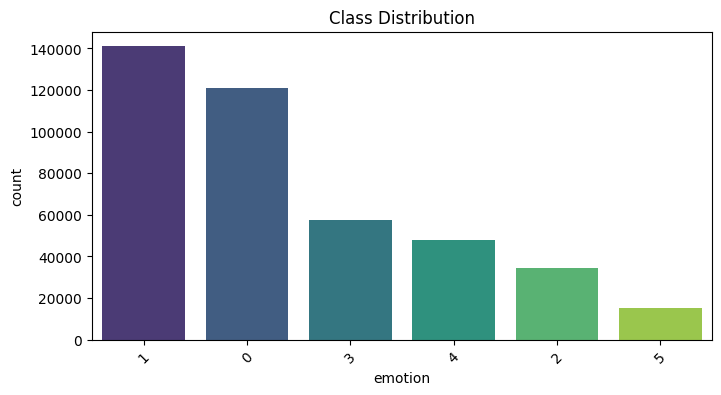

🔹 Basic Statistics:
          Unnamed: 0        emotion
count  416809.000000  416809.000000
mean   208404.000000       1.554271
std    120322.538513       1.490453
min         0.000000       0.000000
25%    104202.000000       0.000000
50%    208404.000000       1.000000
75%    312606.000000       3.000000
max    416808.000000       5.000000 

✅ Exploration Complete!


In [30]:

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

def explore_data(df):
    """
    Performs an initial exploration of a given DataFrame.
    Provides info, missing values, class distribution, and basic statistics.
    Renames 'label' column to 'emotion' if found.
    """
    # Rename 'label' to 'emotion' for consistency
    if 'label' in df.columns:
        df.rename(columns={'label': 'emotion'}, inplace=True)

    print("🔹 Data Overview:")
    print(df.head(), "\n")

    print("🔹 Dataset Info:")
    print(df.info(), "\n")

    print("🔹 Missing Values:")
    print(df.isnull().sum(), "\n")

    print("🔹 Class Distribution:")
    if 'emotion' in df.columns:
        print(df['emotion'].value_counts(), "\n")

        # Plot class distribution
        plt.figure(figsize=(8, 4))
        sns.countplot(x=df['emotion'], palette="viridis", order=df['emotion'].value_counts().index)
        plt.title("Class Distribution")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No categorical label column found.")

    print("🔹 Basic Statistics:")
    print(df.describe(), "\n")

    print("✅ Exploration Complete!")

# Call the function on your dataset
explore_data(df)


**Summary of Code**

The LabelEncoder from sklearn.preprocessing is used to encode categorical labels into numerical values.
Defining a Manual Mapping for Emotions

A dictionary (emotion_mapping) is created to map numerical values (0-5) to corresponding emotion labels (e.g., 0 → "sadness", 1 → "joy", etc.).
Encoding Emotion Labels

The LabelEncoder is instantiated (encoder = LabelEncoder()).
The emotion column in df is transformed into numerical values using .fit_transform(df['emotion']), storing the results in a new column emotion_encoded.
Replacing Encoded Values with Emotion Labels

The emotion_encoded column is mapped back to textual labels using .map(emotion_mapping), creating a new column emotion_label.
Verifying the Mapping

A print statement displays a unique mapping of emotion_encoded to emotion_label using .drop_duplicates() to ensure correctness.


In [31]:
from sklearn.preprocessing import LabelEncoder

# Define manual mapping of encoded values to emotions
emotion_mapping = {
    0: "sadness",
    1: "joy",
    2: "anger",
    3: "fear",
    4: "love",
    5: "surprise"
}
encoder = LabelEncoder()
df['emotion_encoded'] = encoder.fit_transform(df['emotion'])

# Replace numerical values with actual emotions
df['emotion_label'] = df['emotion_encoded'].map(emotion_mapping)

# Verify the updated dataset
print("✅ Corrected Label Mapping (Encoded → Emotion):")
print(df[['emotion_encoded', 'emotion_label']].drop_duplicates())





✅ Corrected Label Mapping (Encoded → Emotion):
    emotion_encoded emotion_label
0                 4          love
1                 0       sadness
6                 2         anger
7                 1           joy
8                 5      surprise
13                3          fear


In [32]:
df.head()

,Unnamed: 0,text,emotion,emotion_encoded,emotion_label
0,0,i just feel really helpless and heavy hearted,4,4,love
1,1,ive enjoyed being able to slouch about relax a...,0,0,sadness
2,2,i gave up my internship with the dmrg and am f...,4,4,love
3,3,i dont know i feel so lost,0,0,sadness
4,4,i am a kindergarten teacher and i am thoroughl...,4,4,love


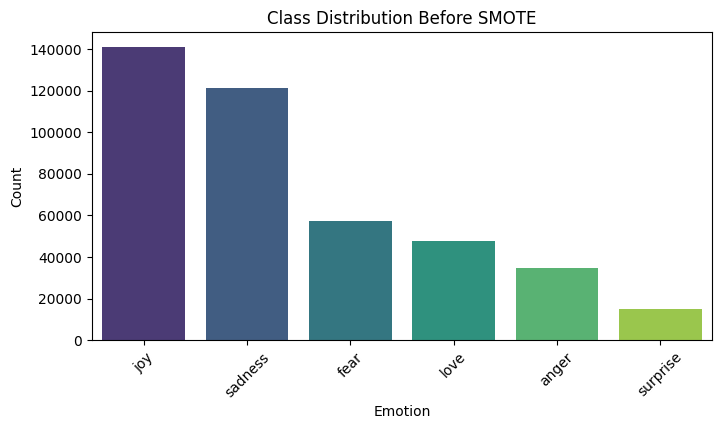

In [33]:


# Plot class distribution after encoding
plt.figure(figsize=(8, 4))
sns.countplot(x=df['emotion_label'], palette="viridis", order=df['emotion_label'].value_counts().index)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [34]:
# Text Cleaning

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
# Initialize stopwords, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    """
    Cleans the input text by applying:
    - Lowercasing
    - Removing punctuation
    - Removing HTML tags
    - Removing extra white spaces
    - Removing numerics
    - Removing stopwords
    - Stemming and Lemmatization
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'\d+', '', text)  # Remove numerics
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    # Tokenize words
    words = text.split()

    # Remove stopwords and apply stemming & lemmatization
    clean_words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words if word not in stop_words]

    return ' '.join(clean_words)

# Apply the function to the dataset
df['clean_text'] = df['text'].apply(clean_text)

# Display a few cleaned examples
df[['text', 'clean_text']].head()

,text,clean_text
0,i just feel really helpless and heavy hearted,feel realli helpless heavi heart
1,ive enjoyed being able to slouch about relax a...,ive enjoy abl slouch relax unwind frankli need...
2,i gave up my internship with the dmrg and am f...,gave internship dmrg feel distraught
3,i dont know i feel so lost,dont know feel lost
4,i am a kindergarten teacher and i am thoroughl...,kindergarten teacher thoroughli weari job take...


In [36]:
df.head()


,Unnamed: 0,text,emotion,emotion_encoded,emotion_label,clean_text
0,0,i just feel really helpless and heavy hearted,4,4,love,feel realli helpless heavi heart
1,1,ive enjoyed being able to slouch about relax a...,0,0,sadness,ive enjoy abl slouch relax unwind frankli need...
2,2,i gave up my internship with the dmrg and am f...,4,4,love,gave internship dmrg feel distraught
3,3,i dont know i feel so lost,0,0,sadness,dont know feel lost
4,4,i am a kindergarten teacher and i am thoroughl...,4,4,love,kindergarten teacher thoroughli weari job take...


In [37]:
# Create a new dataframe

# Selecting necessary columns
df_new = df[['clean_text', 'emotion_label', 'emotion_encoded']].copy()

# Display the first few rows
df_new.head()


,clean_text,emotion_label,emotion_encoded
0,feel realli helpless heavi heart,love,4
1,ive enjoy abl slouch relax unwind frankli need...,sadness,0
2,gave internship dmrg feel distraught,love,4
3,dont know feel lost,sadness,0
4,kindergarten teacher thoroughli weari job take...,love,4


**Apply SMOTE to balance the dataset**

In [38]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from collections import Counter

Convert Text Data into Numerical Format:

Since machine learning models work with numerical data, text must be transformed into a numerical representation.
Use of TF-IDF Vectorization:

TfidfVectorizer converts text into numerical feature vectors based on Term Frequency-Inverse Document Frequency (TF-IDF), capturing the importance of words in the dataset while reducing the impact of common words.

max_features=5000 limits the vocabulary size to 5000 most important words, improving computational efficiency.
Creating Input and Target Variables:

X_vectorized: The transformed text data, ready for model training.

y: The numerical target labels (emotion_encoded), representing the emotion classes for supervised learning.

In [39]:
# Convert text data into numerical

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit vocabulary size
X_vectorized = vectorizer.fit_transform(df_new['clean_text'])

# Target labels (numerical)
y = df_new['emotion_encoded']


In [40]:
# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vectorized, y)

# Verify new class distribution
print("Original class distribution:", Counter(y))
print("Resampled class distribution:", Counter(y_resampled))


Original class distribution: Counter({1: 141067, 0: 121187, 3: 57317, 4: 47712, 2: 34554, 5: 14972})
Resampled class distribution: Counter({4: 141067, 0: 141067, 2: 141067, 1: 141067, 5: 141067, 3: 141067})


✅ Resampled Class Distribution: Counter({4: 141067, 0: 141067, 2: 141067, 1: 141067, 5: 141067, 3: 141067})


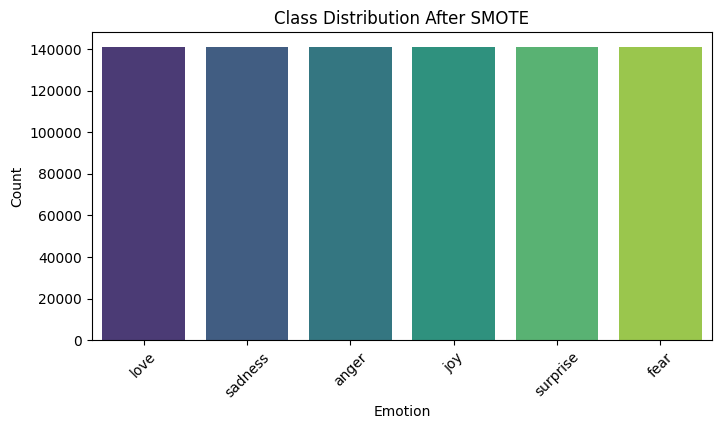

In [41]:
# Check the new class distribution
print("✅ Resampled Class Distribution:", Counter(y_resampled))

# Convert y_resampled back to a DataFrame for visualization
df_balanced = pd.DataFrame({'emotion_encoded': y_resampled})
df_balanced['emotion_label'] = df_balanced['emotion_encoded'].map(emotion_mapping)  # Map back to labels

# Plot the balanced class distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=df_balanced['emotion_label'], palette="viridis", order=df_balanced['emotion_label'].value_counts().index)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Splitting the data **

In [42]:
df_new = df[['clean_text', 'emotion_label', 'emotion_encoded']].copy()
df_new.head()

,clean_text,emotion_label,emotion_encoded
0,feel realli helpless heavi heart,love,4
1,ive enjoy abl slouch relax unwind frankli need...,sadness,0
2,gave internship dmrg feel distraught,love,4
3,dont know feel lost,sadness,0
4,kindergarten teacher thoroughli weari job take...,love,4


In [44]:
from sklearn.model_selection import train_test_split

def split_data(df, test_size=0.2, random_state=42):
    """
    Splits the dataset into training and test sets.

    Parameters:
    - df: DataFrame containing 'clean_text' and 'emotion_encoded' columns.
    - test_size: Proportion of test data (default: 0.2).
    - random_state: Ensures reproducibility (default: 42).

    Returns:
    - X_train, X_test: Train and test text data
    - y_train, y_test: Train and test labels
    """
    # Define features and labels
    X = df['clean_text']  # Processed text
    y = df['emotion_encoded']  # Encoded labels

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Print dataset sizes
    print(f"✅ Data Split Completed!")
    print(f"Training Samples: {len(X_train)}")
    print(f"Testing Samples: {len(X_test)}")

    return X_train, X_test, y_train, y_test

# Call the function
X_train, X_test, y_train, y_test = split_data(df_new)


✅ Data Split Completed!
Training Samples: 333447
Testing Samples: 83362


# Tokenization and Padding

Since neural networks can't process raw text, we need to: ✔ Tokenize → Convert words into numerical sequences
✔ Pad → Ensure all sequences have the same length

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def tokenize_and_pad(X_train, X_test, vocab_size=50000):
    """
    Tokenizes and pads text data with best practices.

    Parameters:
    - X_train: Training text data
    - X_test: Testing text data
    - vocab_size: Maximum vocabulary size (default: 50,000)

    Returns:
    - X_train_padded: Tokenized & padded training data
    - X_test_padded: Tokenized & padded testing data
    - tokenizer: Trained tokenizer object
    - max_length: Maximum sequence length used for padding
    """
    # Initialize tokenizer with OOV token
    tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

    # Fit tokenizer only on training data (to prevent data leakage)
    tokenizer.fit_on_texts(X_train)

    # Convert text to sequences
    X_train_sequences = tokenizer.texts_to_sequences(X_train)
    X_test_sequences = tokenizer.texts_to_sequences(X_test)

    # Determine max sequence length dynamically
    max_length = max(len(tokens) for tokens in X_train_sequences)
    print("✅ Maximum sequence length (maxlen):", max_length)

    # Apply padding
    X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
    X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

    print("✅ Tokenization & Padding Completed!")
    print(f"Training Data Shape: {X_train_padded.shape}")
    print(f"Testing Data Shape: {X_test_padded.shape}")

    return X_train_padded, X_test_padded, tokenizer, max_length

# Call the function
X_train_padded, X_test_padded, tokenizer, max_length = tokenize_and_pad(X_train, X_test)


✅ Maximum sequence length (maxlen): 79
✅ Tokenization & Padding Completed!
Training Data Shape: (333447, 79)
Testing Data Shape: (83362, 79)


**Model Development**

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Bidirectional, Dense, Dropout, BatchNormalization

# Ensure that X_train_padded and max_length are available from tokenize_and_pad()
if 'X_train_padded' not in locals() or 'max_length' not in locals():
    raise ValueError("Error: Tokenization & Padding must be completed first. Please run tokenize_and_pad().")

# Compute dynamic vocabulary size
input_Size = np.max(X_train_padded) + 1  # Ensure correct vocabulary size

# Define the model
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=input_Size, output_dim=128, input_length=max_length))  # Use max_length from function

# Dropout (To prevent overfitting)
model.add(Dropout(0.5))

# Add Bidirectional GRU layers
model.add(Bidirectional(GRU(120, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True)))

# Batch Normalization (Improves training stability)
model.add(BatchNormalization())

# Final GRU layer
model.add(GRU(64))

# Output layer for 6 emotion classes
model.add(Dense(6, activation='softmax'))

# Explicitly build the model
model.build(input_shape=(None, max_length))  # Use max_length

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 79, 128)             │       5,927,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 79, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 79, 240)             │         180,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 79, 128)             │         117,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 79, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,263,078 (23.89 MB)

 Trainable params: 6,262,822 (23.89 MB)

 Non-trainable params: 256 (1.00 KB)

# Train the Model

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping (Stop training if validation loss doesn't improve for 3 consecutive epochs)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Optimized training parameters
batch_size = 64  # Balanced batch size
epochs = 15  # More epochs with early stopping

# Train the model
print("\n🚀 Training Optimized Model...")
history = model.fit(
    X_train_padded, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_padded, y_test),
    callbacks=[early_stopping],  # Stops early if needed
    verbose=1  # Show training progress
)



🚀 Training Optimized Model...
Epoch 1/15
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 950s 181ms/step - accuracy: 0.3321 - loss: 1.5822 - val_accuracy: 0.2908 - val_loss: 1.5855
Epoch 2/15
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 959s 184ms/step - accuracy: 0.6972 - loss: 0.7187 - val_accuracy: 0.9262 - val_loss: 0.1374
Epoch 3/15
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 947s 182ms/step - accuracy: 0.9251 - loss: 0.1409 - val_accuracy: 0.9254 - val_loss: 0.1382
Epoch 4/15
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 961s 184ms/step - accuracy: 0.9286 - loss: 0.1308 - val_accuracy: 0.9270 - val_loss: 0.1345
Epoch 5/15
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 960s 184ms/step - accuracy: 0.9310 - loss: 0.1238 - val_accuracy: 0.9246 - val_loss: 0.1367
Epoch 6/15
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 963s 185ms/step - accuracy: 0.9320 - loss: 0.1191 - val_accuracy: 0.9272 - val_loss: 0.1330
Epoch 7/15
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 964s 185ms/step - accuracy: 0.9344 - loss: 0.1147 - val_accuracy: 0.9264 - val_loss: 0.1329
Epoch 8/15
5211/5211 ━━━━━━━━━━

In [48]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)

# Print results
print(f"\n✅ Model Evaluation Results:")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")


2606/2606 ━━━━━━━━━━━━━━━━━━━━ 73s 28ms/step - accuracy: 0.9259 - loss: 0.1339

✅ Model Evaluation Results:
Test Accuracy: 0.9264
Test Loss: 0.1329


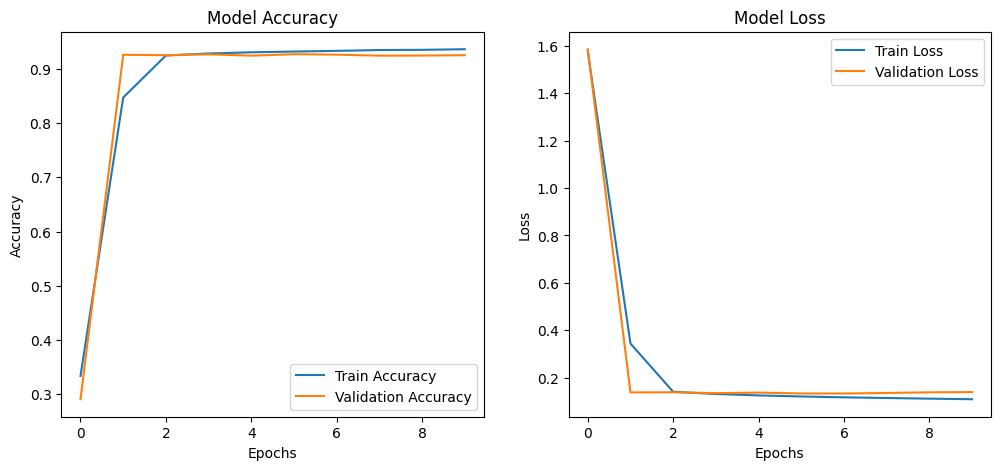

In [49]:

# Function to plot training accuracy and loss
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.show()

# Call the function
plot_training_history(history)


In [54]:
import numpy as np

def predict_emotion(text, model, tokenizer, max_length, label_mapping):
    """
    Predicts the emotion of a given text using the trained model.

    Parameters:
    - text: The input text to classify.
    - model: The trained model.
    - tokenizer: The trained tokenizer.
    - max_length: The maximum sequence length for padding.
    - label_mapping: Dictionary mapping encoded labels to emotion labels.

    Returns:
    - Predicted emotion label.
    """

    # Clean the text (using the same preprocessing steps)
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    # Tokenize and pad the input text
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

    # Predict emotion
    prediction = model.predict(padded_sequence)
    predicted_label = np.argmax(prediction)  # Get the label with the highest probability

    # Convert encoded label back to emotion name
    predicted_emotion = label_mapping[predicted_label]

    return predicted_emotion

# Define label mapping (Make sure this matches the training label encoding)
label_mapping = {
    0: "sadness",
    1: "joy",
    2: "anger",
    3: "fear",
    4: "love",
    5: "surprise"
}

# Example test inputs
test_sentences = [
    "I am so happy today!",
    "I feel so sad and alone.",
    "This is making me angry!",
    "I am scared of what will happen next.",
    "I love this moment!",
    "Wow! That was unexpected!",
    "I never expected to win the lottery today!",
    "I feel so lonely and broken inside.",
    "You mean the world to me, and I will always cherish you."
]

# Predict emotions for test sentences
for sentence in test_sentences:
    emotion = predict_emotion(sentence, model, tokenizer, max_length, label_mapping)
    print(f"Text: {sentence} → Predicted Emotion: {emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Text: I am so happy today! → Predicted Emotion: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Text: I feel so sad and alone. → Predicted Emotion: sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Text: This is making me angry! → Predicted Emotion: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Text: I am scared of what will happen next. → Predicted Emotion: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Text: I love this moment! → Predicted Emotion: joy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Text: Wow! That was unexpected! → Predicted Emotion: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Text: I never expected to win the lottery today! → Predicted Emotion: joy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Text: I feel so lonely and broken inside. → Predicted Emotion: anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Text: You mean the world to me, and I will always cherish you. → Predicted Emotion: fear


**🔹 Summary of Model Issues & Fixes**

1️⃣ Overprediction of "Fear" Emotion
Issue: Model predicts "fear" for unrelated sentences.
Possible Cause: Some words (e.g., "unexpected") are strongly linked to fear in training data.
Suggested Fix: Use an attention mechanism to improve context understanding.

2️⃣ Joy & Surprise Confusion
Issue: Model confuses joy and surprise.
Possible Cause: "Unexpected" might be overrepresented in joyful examples.
Suggested Fix: Add more training examples specifically for "surprise".

3️⃣ Anger & Sadness Confusion
Issue: Model predicts "anger" instead of "sadness".
Possible Cause: Words like "lonely" and "broken" might be misclassified due to dataset overlap.
Suggested Fix: Manually add more sadness-related sentences to training data.

4️⃣ Love Misclassified as Fear
Issue: Model struggles to identify "love".
Possible Cause: Insufficient training examples for love-related expressions.
Suggested Fix: Increase training data size for "love".

5️⃣ Underfitting (Low Accuracy on Some Emotions)
Issue: Model fails to learn distinct patterns for some emotions.
Possible Cause: Model architecture might be too simple.
Suggested Fix: Add more GRU layers and increase embedding size.

6️⃣ SMOTE Does Not Improve Diversity
Issue: SMOTE balances classes but doesn’t add varied expressions.
Possible Cause: SMOTE only generates synthetic samples, not new word combinations.
Suggested Fix: Use NLP augmentation like synonym replacement and back-translation.

7️⃣ Training Insufficient for Generalization
Issue: Model may not have trained long enough.
Possible Cause: Too few epochs or early stopping too soon.
Suggested Fix: Train for more epochs with early stopping to optimize learning.

8️⃣ Lack of Context Awareness
Issue: Model misinterprets sentences with multiple meanings.
Possible Cause: It relies too much on single-word associations.
Suggested Fix: Use an attention mechanism to focus on important words in a sentence.


